In [33]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

conn = psycopg2.connect(
    dbname=os.getenv("COCKROACH_DB"),
    user=os.getenv("COCKROACH_USER"),
    password=os.getenv("COCKROACH_PASS"),
    host=os.getenv("COCKROACH_HOST"),
    port=os.getenv("COCKROACH_PORT"),
    sslmode="require"
)



In [34]:
#Create a cursor object to interact with the database
cursor = conn.cursor()

# Execute a query to list all tables in the database
cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'")

# Fetch all results (table names)
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])
# Load data from each table into pandas DataFrame
lyrics_df = pd.read_sql("SELECT * FROM lyrics", conn)
track_reference_df = pd.read_sql("SELECT * FROM track_reference", conn)
track_links_df = pd.read_sql("SELECT * FROM track_links", conn)
audio_features_df = pd.read_sql("SELECT * FROM audio_features", conn)
lyrics_emotions_df = pd.read_sql("SELECT * FROM lyrics_emotions", conn)

# Close the cursor and connection
cursor.close()
conn.close()

lyrics
track_reference
track_links
audio_features
lyrics_emotions


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21752\1822658609.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lyrics_df = pd.read_sql("SELECT * FROM lyrics", conn)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21752\1822658609.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  track_reference_df = pd.read_sql("SELECT * FROM track_reference", conn)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21752\1822658609.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  track_links_df = pd.read_sql("SELECT * FROM track_links", con

In [35]:
numeric_columns = df_audio_features.select_dtypes(include='number').columns.tolist()
print("Numeric Columns:")
print(numeric_columns)


Numeric Columns:
['duration_seconds', 'sample_rate', 'tempo', 'loudness', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth', 'spectral_flatness', 'zero_crossing_rate', 'rms_energy', 'tempo_variability', 'f0_mean', 'mel_mean', 'dynamic_range', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'spectral_contrast_1', 'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6', 'spectral_contrast_7', 'chroma_cens_1', 'chroma_cens_2', 'chroma_cens_3', 'chroma_cens_4', 'chroma_cens_5', 'chroma_cens_6', 'chroma_cens_7', 'chroma_cens_8', 'chroma_cens_9', 'chroma_cens_10', 'chroma_cens_11', 'chroma_cens_12', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4', 'tonnetz_5', 'tonnetz_6']


In [36]:
print(df_audio_features[numeric_columns].describe())


       duration_seconds  sample_rate        tempo     loudness  danceability  \
count       1096.000000       1096.0  1096.000000  1096.000000        1096.0   
mean         222.216898      44100.0   122.930438     1.120038           0.5   
std           76.310545          0.0    19.342077     0.168169           0.0   
min           22.848458      44100.0    77.133862     0.508081           0.5   
25%          184.060000      44100.0   109.956782     1.006130           0.5   
50%          216.879546      44100.0   123.046875     1.104600           0.5   
75%          255.010272      44100.0   135.999178     1.218634           0.5   
max          846.485351      44100.0   178.205819     1.974892           0.5   

            energy  speechiness  acousticness  instrumentalness     liveness  \
count  1096.000000  1096.000000   1096.000000       1096.000000  1096.000000   
mean      0.199325     0.054739      0.945261          0.748332     0.011441   
std       0.073938     0.022714      0.

In [45]:
# Check the columns in each DataFrame
print(audio_features_df.columns)
print(lyrics_emotions_df.columns)
print(track_reference_df.columns)
print(track_links_df.columns)


Index(['musicbrainz_id', 'duration_seconds', 'sample_rate', 'tempo',
       'loudness', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'spectral_centroid',
       'spectral_rolloff', 'spectral_bandwidth', 'spectral_flatness',
       'zero_crossing_rate', 'rms_energy', 'tempo_variability', 'f0_mean',
       'mel_mean', 'dynamic_range', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
       'spectral_contrast_6', 'spectral_contrast_7', 'chroma_cens_1',
       'chroma_cens_2', 'chroma_cens_3', 'chroma_cens_4', 'chroma_cens_5',
       'chroma_cens_6', 'chroma_cens_7', 'chroma_cens_8', 'chroma_cens_9',
       'chroma_cens_10', 'chroma_cens_11', 'chroma_cens_12', 'tonnetz_1',
       'tonnetz_2', 'tonnetz_3', 'tonne

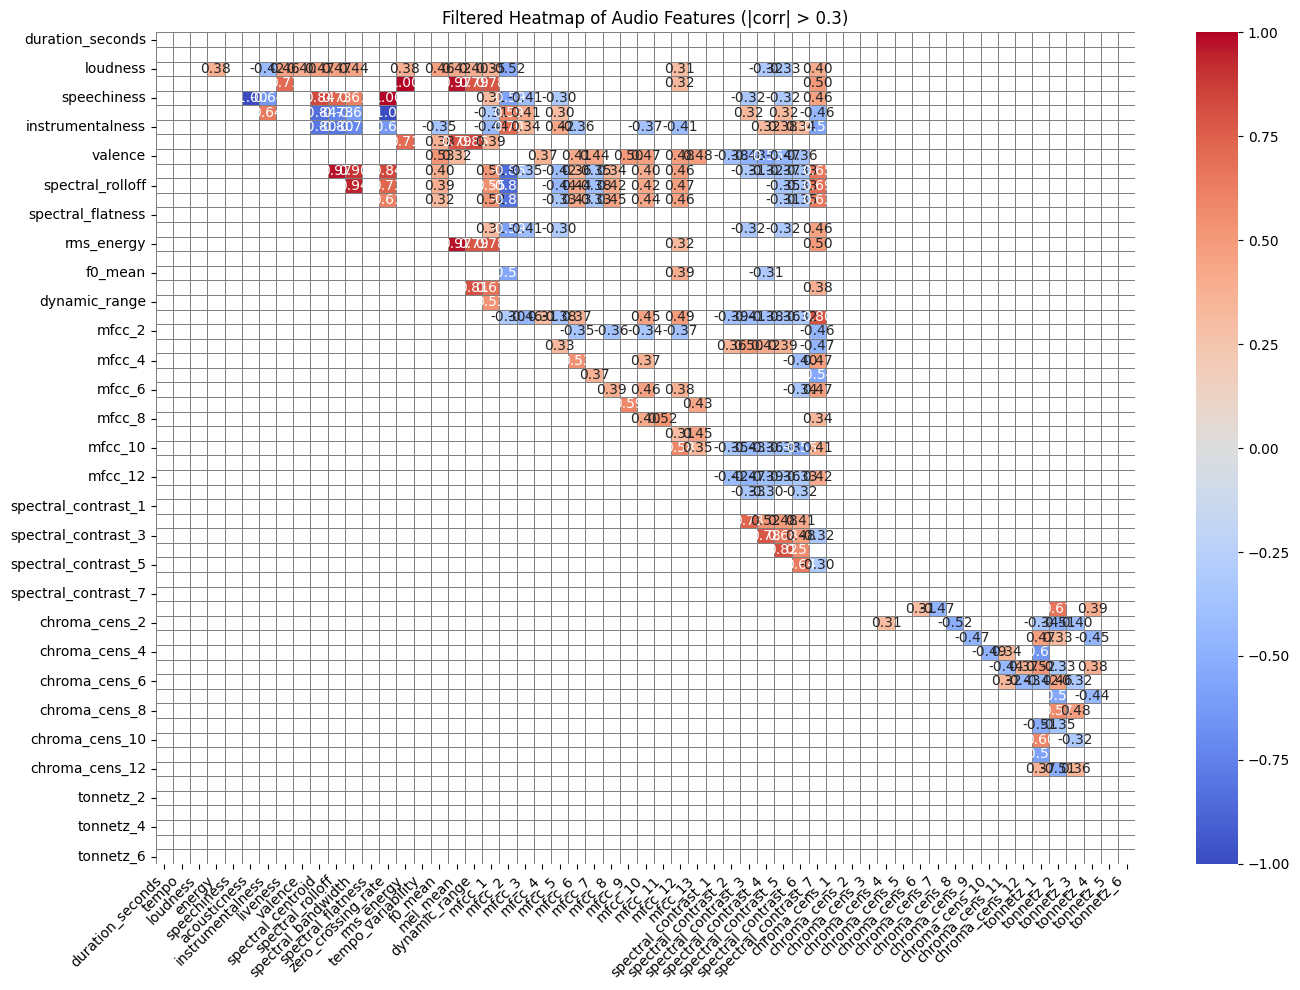

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select only numeric columns
numeric_df = df_audio_features.select_dtypes(include=[np.number])

# Step 2: Drop low-variance columns (e.g., danceability if constant)
low_variance_cols = [col for col in numeric_df.columns if numeric_df[col].nunique() <= 1]
numeric_df = numeric_df.drop(columns=low_variance_cols)

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Filter correlations > 0.3 (and not self-correlation)
filtered_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strong_corrs = filtered_corr[(filtered_corr.abs() > 0.3)]

# Step 5: Plot heatmap only if strong correlations exist
if not strong_corrs.dropna(how='all').empty:
    plt.figure(figsize=(14, 10))
    sns.heatmap(strong_corrs, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='grey')
    plt.title("Filtered Heatmap of Audio Features (|corr| > 0.3)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No strong correlations found (|corr| > 0.3)")


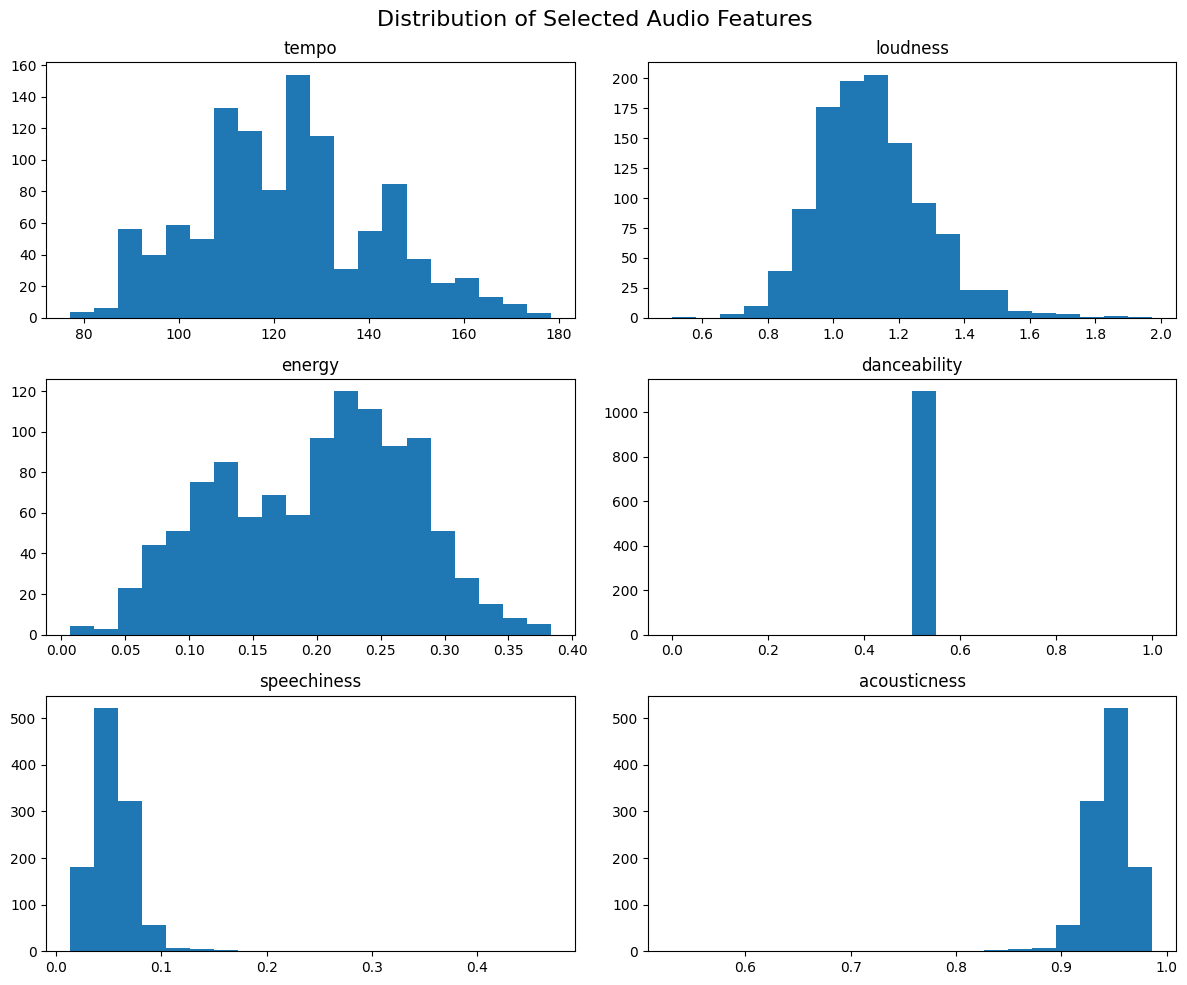

In [38]:
features_to_plot = ['tempo', 'loudness', 'energy', 'danceability', 'speechiness', 'acousticness']

df_audio_features[features_to_plot].hist(bins=20, figsize=(12, 10), grid=False)
plt.suptitle("Distribution of Selected Audio Features", fontsize=16)
plt.tight_layout()
plt.show()


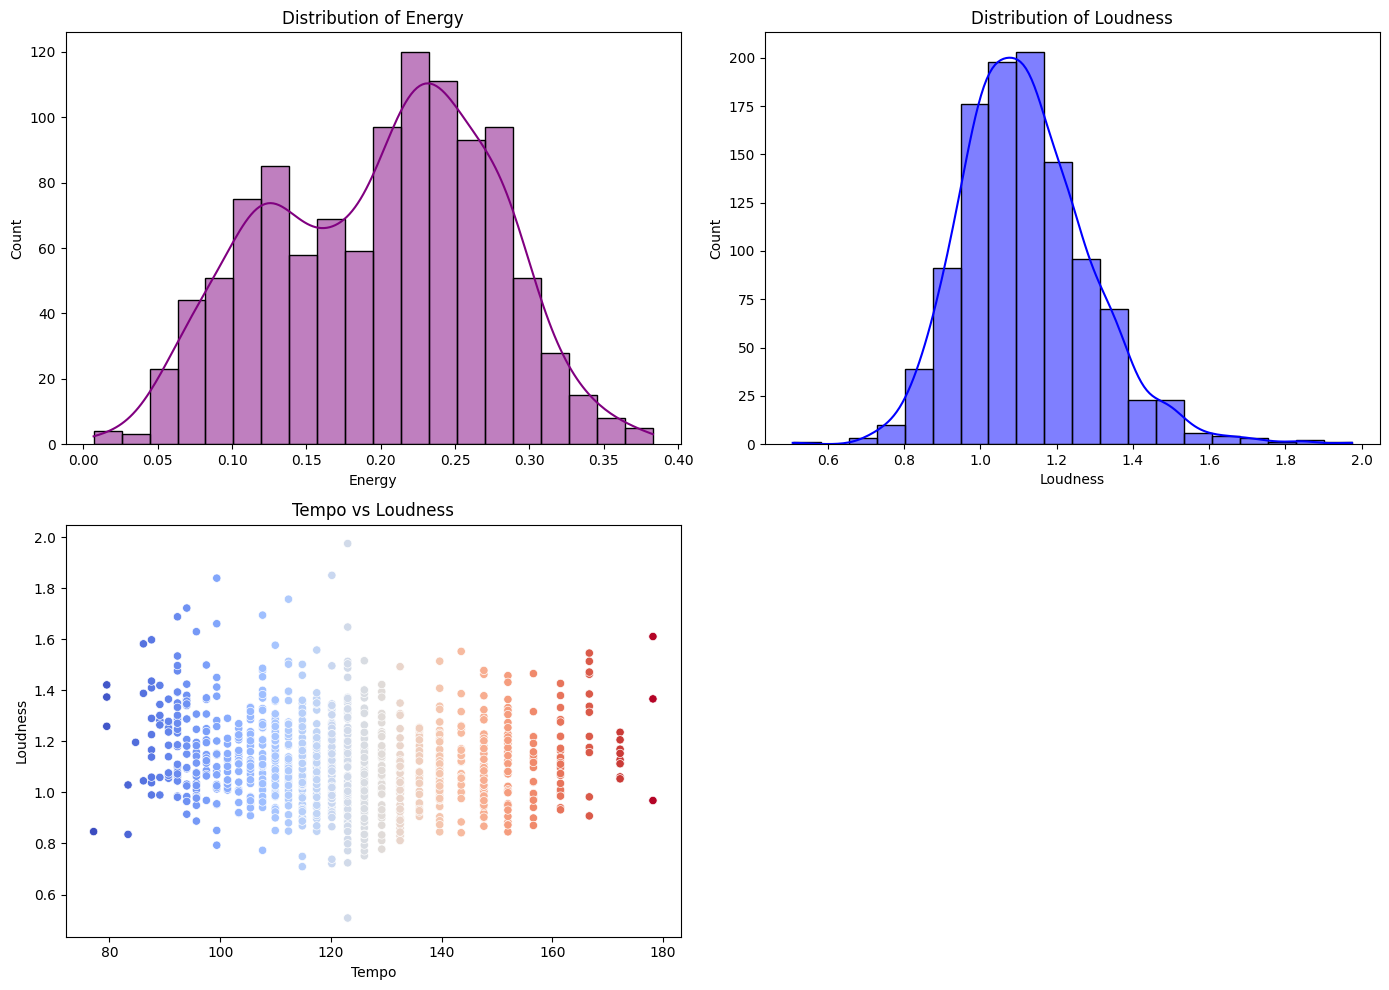

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Safety check for the main DataFrame
df = df_audio_features.copy()

# Create subplots
plt.figure(figsize=(14, 10))

# 1. Distribution of Energy
plt.subplot(2, 2, 1)
sns.histplot(df['energy'], kde=True, color='purple', bins=20)
plt.title('Distribution of Energy')
plt.xlabel('Energy')

# 2. Distribution of Loudness
plt.subplot(2, 2, 2)
sns.histplot(df['loudness'], kde=True, color='blue', bins=20)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')

# 3. Tempo vs Loudness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='tempo', y='loudness', hue='tempo', palette='coolwarm', legend=False)
plt.title('Tempo vs Loudness')
plt.xlabel('Tempo')
plt.ylabel('Loudness')


plt.tight_layout()
plt.show()


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Example: Creating a normal distribution of 'energy' values
np.random.seed(42)
energy_data = np.random.normal(loc=0, scale=1, size=1000)  # mean=0, std=1, n=1000


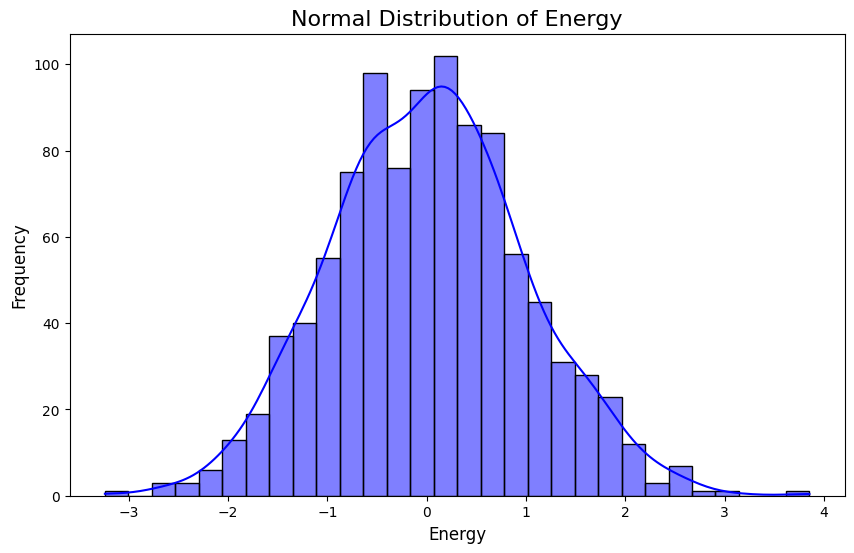

In [42]:
# Plot normal distribution graph
plt.figure(figsize=(10, 6))

# Histogram of the 'energy' data with density = True to plot the PDF
sns.histplot(energy_data, kde=True, color='blue', bins=30)

# Title and labels
plt.title('Normal Distribution of Energy', fontsize=16)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


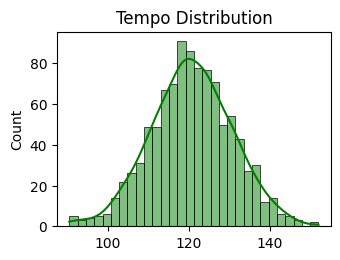

In [43]:
# Generate data for 'tempo'
tempo_data = np.random.normal(loc=120, scale=10, size=1000)  # Mean tempo=120, std=10
# Plot normal distribution for 'tempo'
plt.subplot(2, 2, 3)
sns.histplot(tempo_data, kde=True, color='green', bins=30)
plt.title('Tempo Distribution')

# Show the plots
plt.tight_layout()
plt.show()


In [46]:
# Merge audio_features and lyrics_emotions on musicbrainz_id
merged_df = pd.merge(audio_features_df, lyrics_emotions_df, on="musicbrainz_id", how="inner")

# Merge track_reference with the merged DataFrame on musicbrainz_id
merged_df = pd.merge(merged_df, track_reference_df, on="musicbrainz_id", how="inner")

# Merge track_links with the merged DataFrame on musicbrainz_id
merged_df = pd.merge(merged_df, track_links_df, on="musicbrainz_id", how="inner")

# Preview the merged DataFrame
merged_df.head()


,musicbrainz_id,duration_seconds,sample_rate,tempo,loudness,danceability,energy,speechiness,acousticness,instrumentalness,...,artist,artist_id,album,album_id,release_date,country,length,track_title,channel,webpage_url
0,00b1397d-7f3e-4c59-bb42-ccd7fa17ee10,38.672857,44100,129.199219,0.917355,0.5,0.189481,0.066829,0.933171,0.737652,...,Ariana Grande,f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387,"sweetener / thank u, next tour - live at Coach...",6cd36f2a-0c90-45ea-b63b-0e922f1df4ba,2019-04-19,XW,36000.0,Ariana Grande - raindrops (an angel cried) (Au...,Ariana Grande,https://www.youtube.com/watch?v=-ZoJSLB2N18
1,00c9dcab-4abf-47f5-9755-c5c805b779c7,221.226667,44100,109.956782,1.234235,0.5,0.290337,0.041717,0.958283,0.681417,...,Ye,164f0d73-1234-4e2c-8743-d77bf2191051,BET Awards: '04 Nominees,d9f9fa38-f06e-4d22-abf8-73b60983ef8f,2004-01-01,US,270386.0,Through The Wire,Kanye West,https://www.youtube.com/watch?v=AE8y25CcE6s
2,012e3459-b54d-49e9-b48d-d0922d295c5a,105.986667,44100,97.508844,1.196811,0.5,0.168411,0.088748,0.911252,0.650793,...,The Beatles,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,"UK EP Collection, Volume 1",51443d4d-fdb8-4d4e-8b61-58237764e6ae,2000-01-01,XW,107000.0,I'll Cry Instead (Remastered 2009),The Beatles,https://www.youtube.com/watch?v=zfnkMBOSIUQ
3,013a7fe3-0113-4604-a295-f74a0b88bf05,203.093333,44100,117.453835,0.849336,0.5,0.123573,0.033946,0.966054,0.845642,...,Billy Joel,64b94289-9474-4d43-8c93-918ccc1920d1,"Retold, Volume 3: Souvenir of a Stranger at th...",c5c69643-b9d3-446b-a773-57747bc1ad08,1995-01-01,US,120560.0,Billy Joel - She's Always a Woman (Official Au...,Billy Joel,https://www.youtube.com/watch?v=Cx3QmqV2pHg
4,01564f1c-99b2-466a-a60d-4e22a5008525,151.744014,44100,123.046875,0.889903,0.5,0.195228,0.026959,0.973041,0.815602,...,Kacey Musgraves,d1393ecb-431b-4fde-a6ea-d769f2f040cb,star‐crossed,80ec0d1a-00cf-465c-b832-26f15b558b57,2021-09-10,NULL,140000.0,KACEY MUSGRAVES - angel (official lyric video),K A C E Y M U S G R A V E S,https://www.youtube.com/watch?v=1jS-3q7qIfw


In [47]:
# Check the basic structure and summary of the merged DataFrame
merged_df_info = merged_df.info()
merged_df_head = merged_df.head()

print("DataFrame Structure:")
print(merged_df_info)

print("\nFirst few rows of the merged DataFrame:")
print(merged_df_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Columns: 115 entries, musicbrainz_id to webpage_url
dtypes: float64(103), int64(1), object(11)
memory usage: 984.8+ KB
DataFrame Structure:
None

First few rows of the merged DataFrame:
                         musicbrainz_id  duration_seconds  sample_rate  \
0  00b1397d-7f3e-4c59-bb42-ccd7fa17ee10         38.672857        44100   
1  00c9dcab-4abf-47f5-9755-c5c805b779c7        221.226667        44100   
2  012e3459-b54d-49e9-b48d-d0922d295c5a        105.986667        44100   
3  013a7fe3-0113-4604-a295-f74a0b88bf05        203.093333        44100   
4  01564f1c-99b2-466a-a60d-4e22a5008525        151.744014        44100   

        tempo  loudness  danceability    energy  speechiness  acousticness  \
0  129.199219  0.917355           0.5  0.189481     0.066829      0.933171   
1  109.956782  1.234235           0.5  0.290337     0.041717      0.958283   
2   97.508844  1.196811           0.5  0.168411     0.088748 

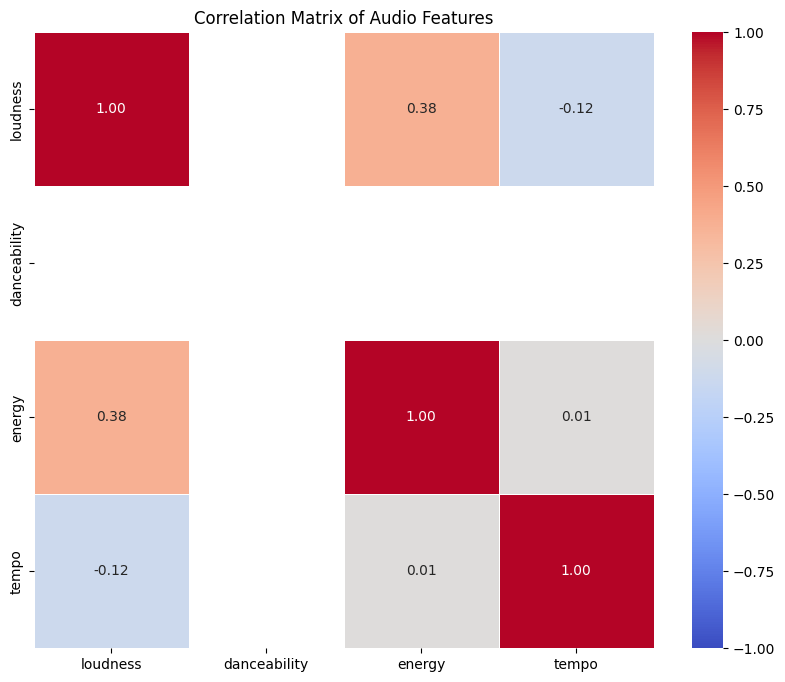

In [49]:
# Calculate the correlation matrix
corr_matrix = merged_df[numeric_features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21752\1003944471.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_artists_df, x='artist', y='energy', inner='quart', palette='coolwarm')


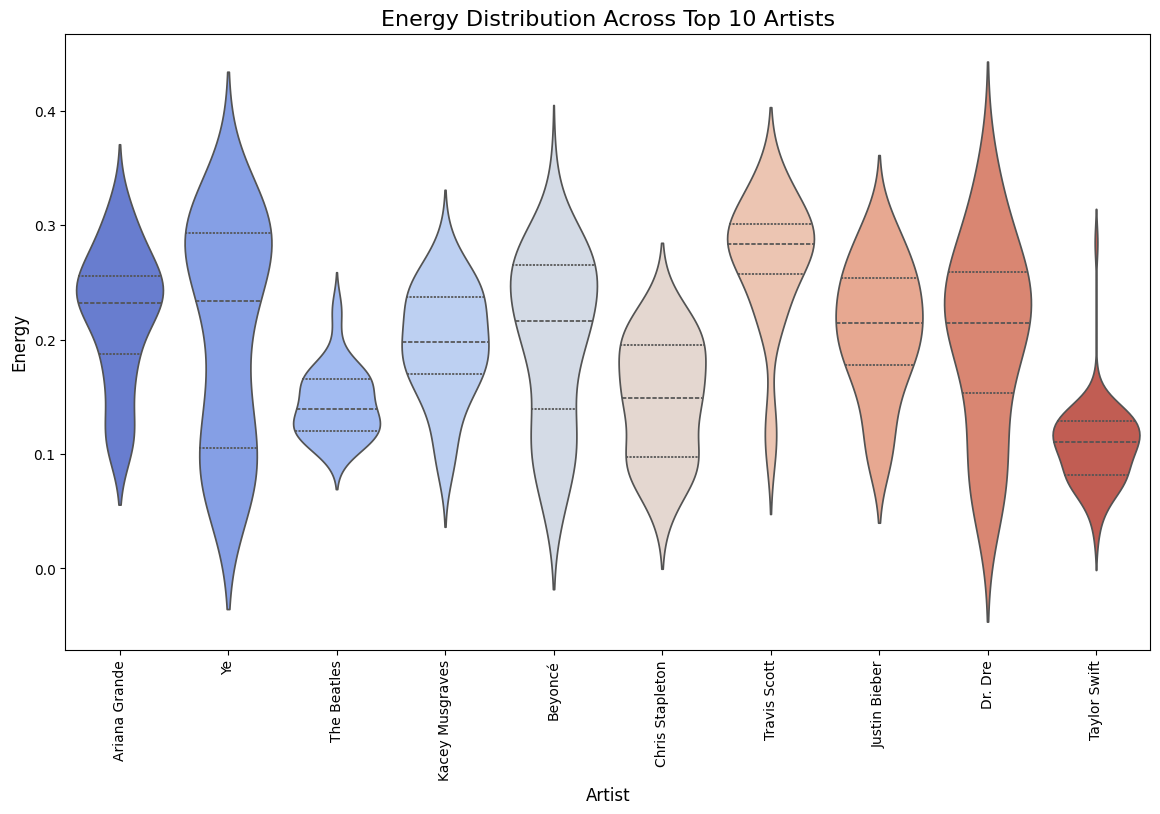

In [52]:
# Filter for the top artists (same as the previous step)
top_artists_df = merged_df[merged_df['artist'].isin(top_artists)]

# Plot the distribution of energy using a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=top_artists_df, x='artist', y='energy', inner='quart', palette='coolwarm')

# Add title and customize x-axis
plt.title('Energy Distribution Across Top 10 Artists', fontsize=16)
plt.xticks(rotation=90)  # Rotate artist names for better readability
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Energy', fontsize=12)

# Show the plot
plt.show()


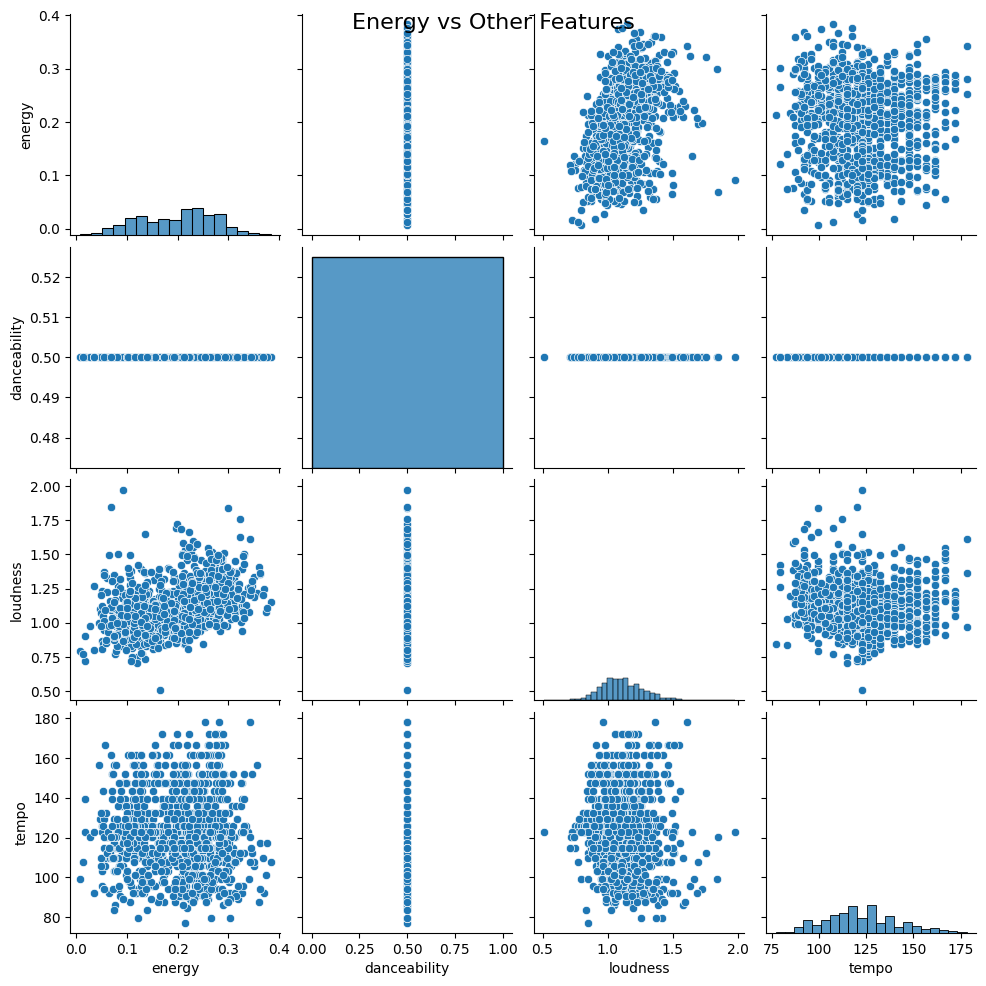

In [60]:
# Create pairplot without the hue parameter
sns.pairplot(merged_df[features_of_interest])
plt.suptitle('Energy vs Other Features', fontsize=16)
plt.show()



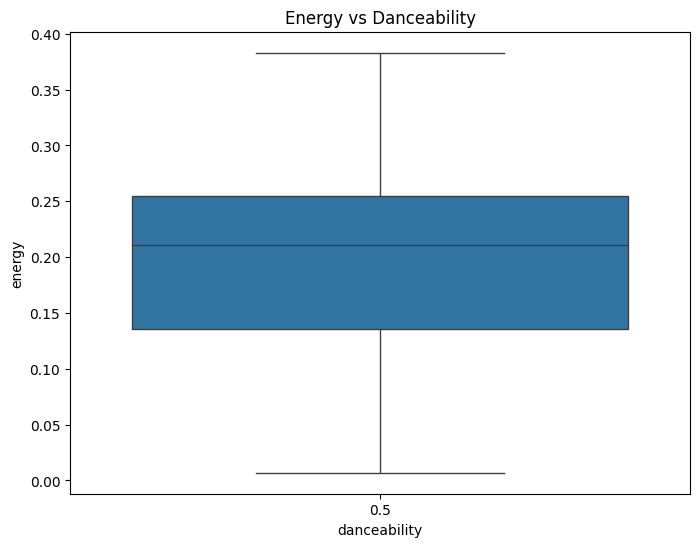

In [64]:
# Boxplot to analyze energy vs. danceability
plt.figure(figsize=(8, 6))
sns.boxplot(x='danceability', y='energy', data=merged_df)
plt.title('Energy vs Danceability')
plt.show()



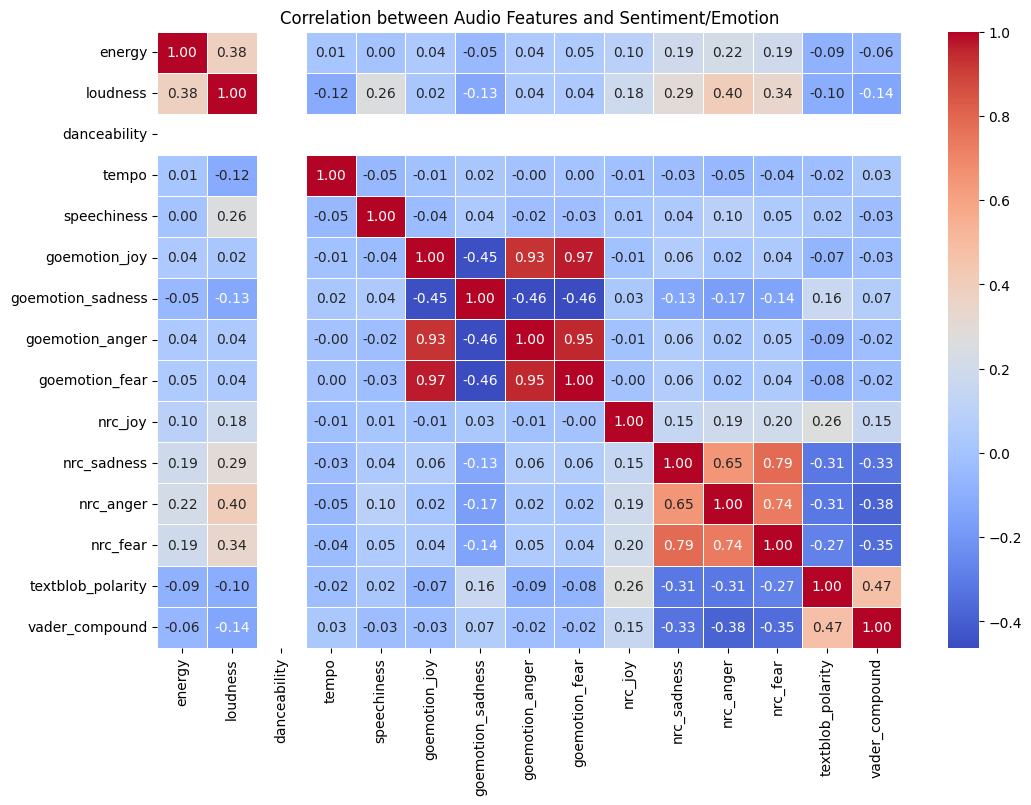

In [66]:
# Select key audio and sentiment/emotion features
audio_features = ['energy', 'loudness', 'danceability', 'tempo', 'speechiness']
emotion_features = [
    'goemotion_joy', 'goemotion_sadness', 'goemotion_anger', 'goemotion_fear',
    'nrc_joy', 'nrc_sadness', 'nrc_anger', 'nrc_fear', 'textblob_polarity',
    'vader_compound'
]

# Combine the features for correlation analysis
merged_subset = merged_df[audio_features + emotion_features]

# Calculate the correlation matrix
corr_matrix = merged_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Audio Features and Sentiment/Emotion')
plt.show()


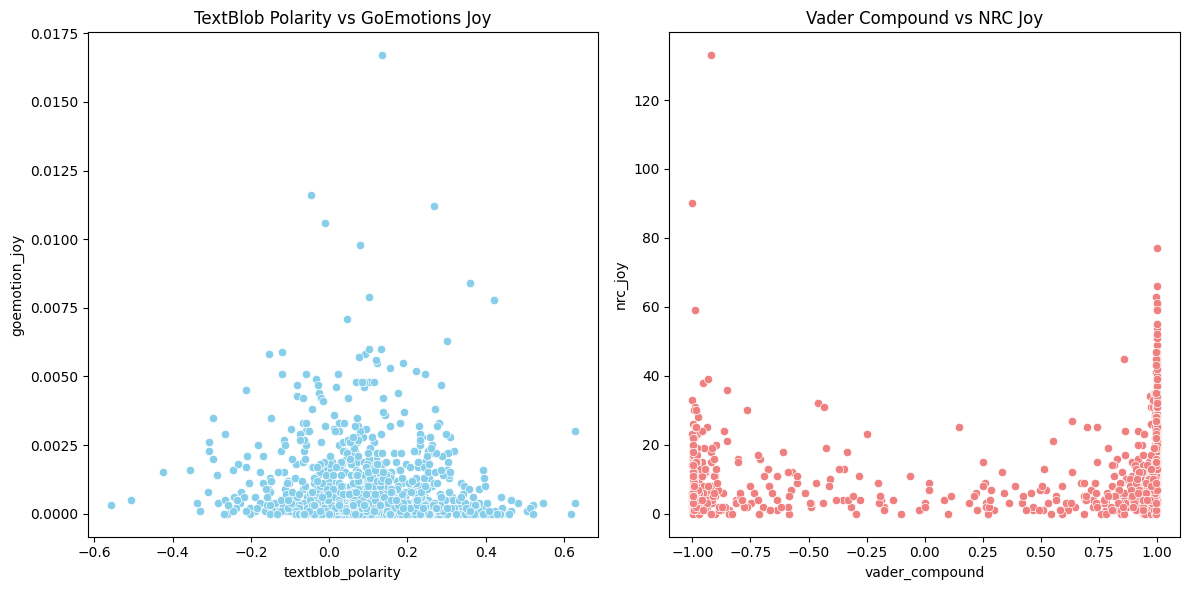

In [67]:
plt.figure(figsize=(12, 6))

# Plot TextBlob polarity vs GoEmotions joy
plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['textblob_polarity'], y=merged_df['goemotion_joy'], color='skyblue')
plt.title('TextBlob Polarity vs GoEmotions Joy')

# Plot Vader compound vs NRC joy
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['vader_compound'], y=merged_df['nrc_joy'], color='lightcoral')
plt.title('Vader Compound vs NRC Joy')

plt.tight_layout()
plt.show()


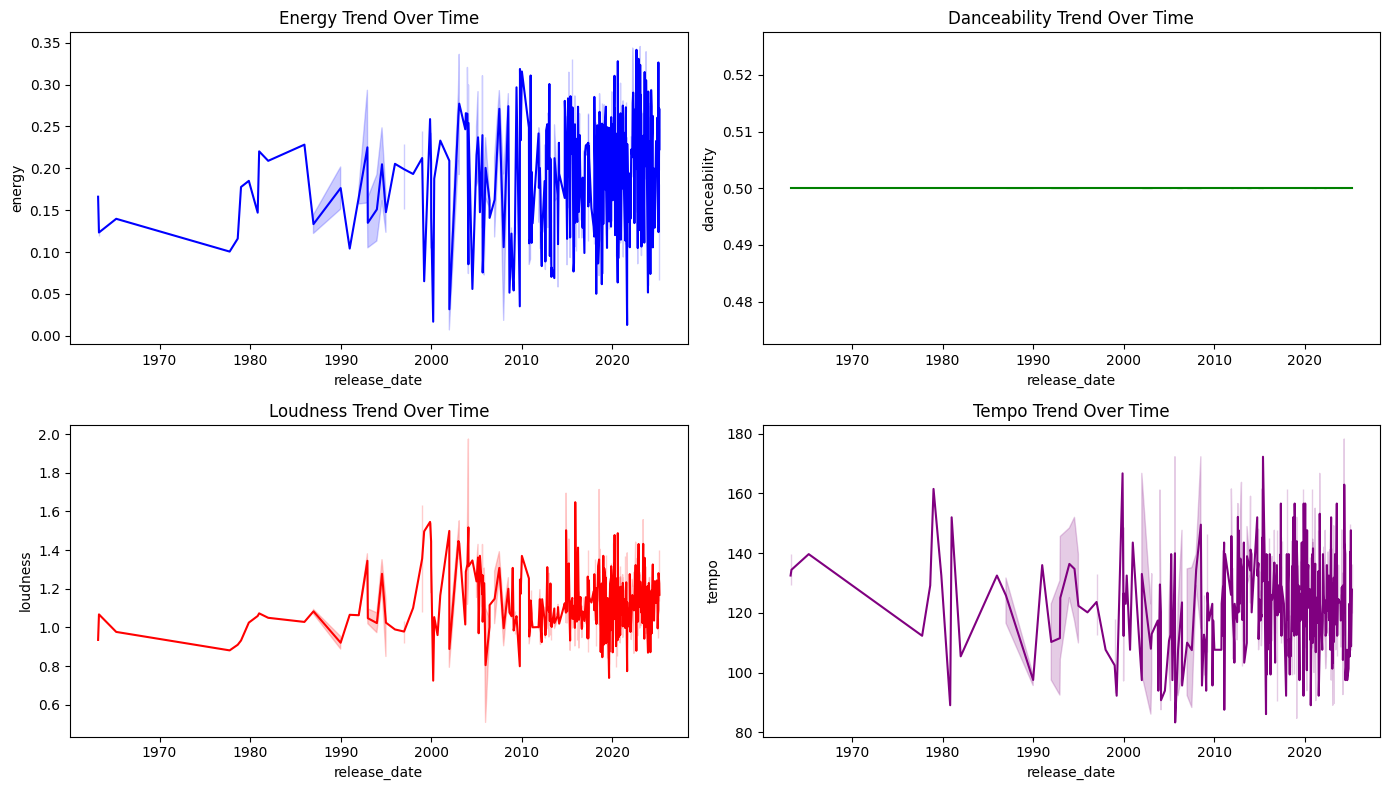

In [68]:
# Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Plot trends of audio features over time
plt.figure(figsize=(14, 8))

# Plot Energy vs Release Date
plt.subplot(2, 2, 1)
sns.lineplot(x=merged_df['release_date'], y=merged_df['energy'], color='blue')
plt.title('Energy Trend Over Time')

# Plot Danceability vs Release Date
plt.subplot(2, 2, 2)
sns.lineplot(x=merged_df['release_date'], y=merged_df['danceability'], color='green')
plt.title('Danceability Trend Over Time')

# Plot Loudness vs Release Date
plt.subplot(2, 2, 3)
sns.lineplot(x=merged_df['release_date'], y=merged_df['loudness'], color='red')
plt.title('Loudness Trend Over Time')

# Plot Tempo vs Release Date
plt.subplot(2, 2, 4)
sns.lineplot(x=merged_df['release_date'], y=merged_df['tempo'], color='purple')
plt.title('Tempo Trend Over Time')

plt.tight_layout()
plt.show()


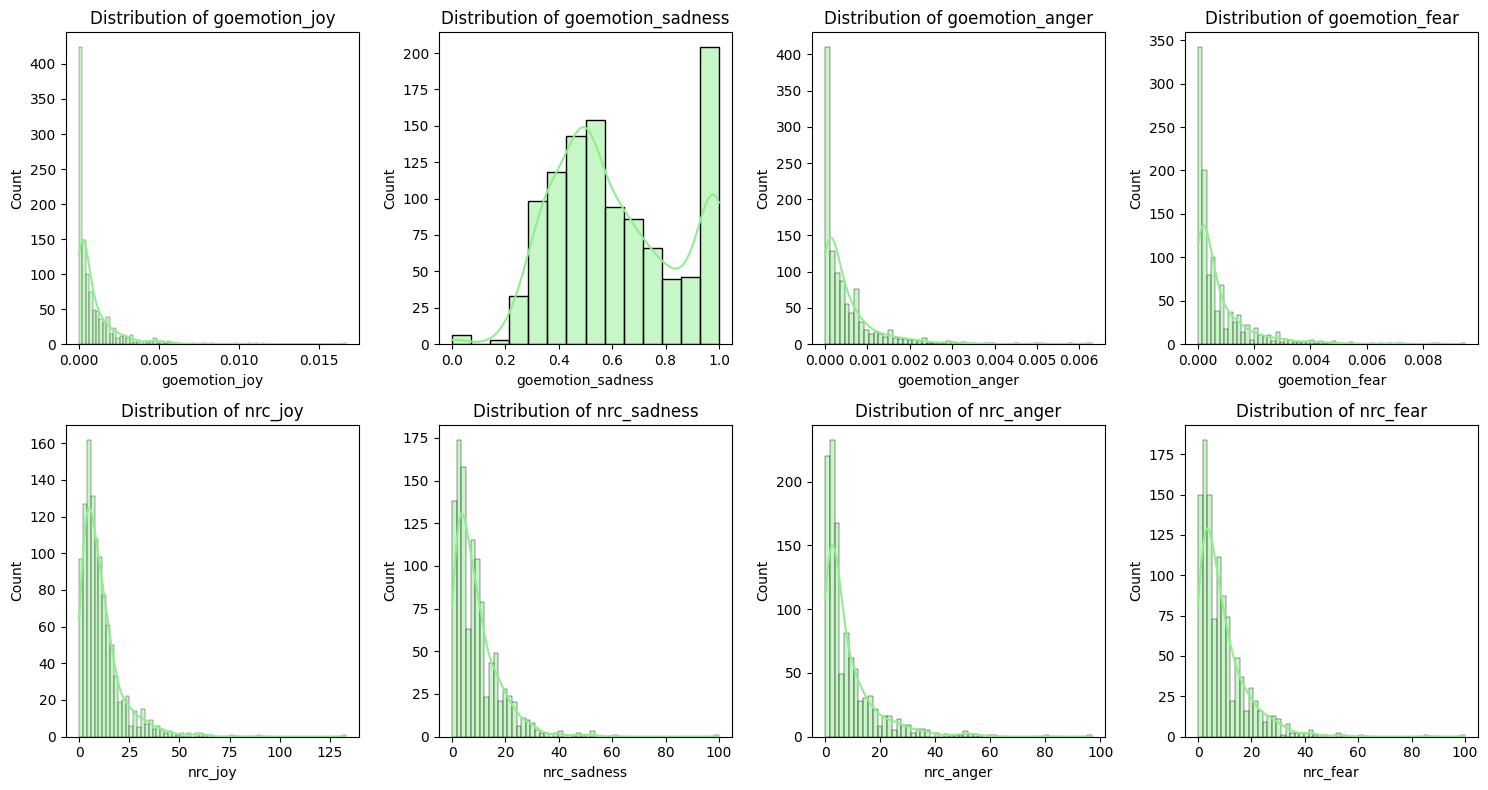

In [69]:
# Plot the distribution of emotions
emotion_columns = ['goemotion_joy', 'goemotion_sadness', 'goemotion_anger', 'goemotion_fear', 'nrc_joy', 'nrc_sadness', 'nrc_anger', 'nrc_fear']

plt.figure(figsize=(15, 8))
for i, column in enumerate(emotion_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(merged_df[column], kde=True, color='lightgreen')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


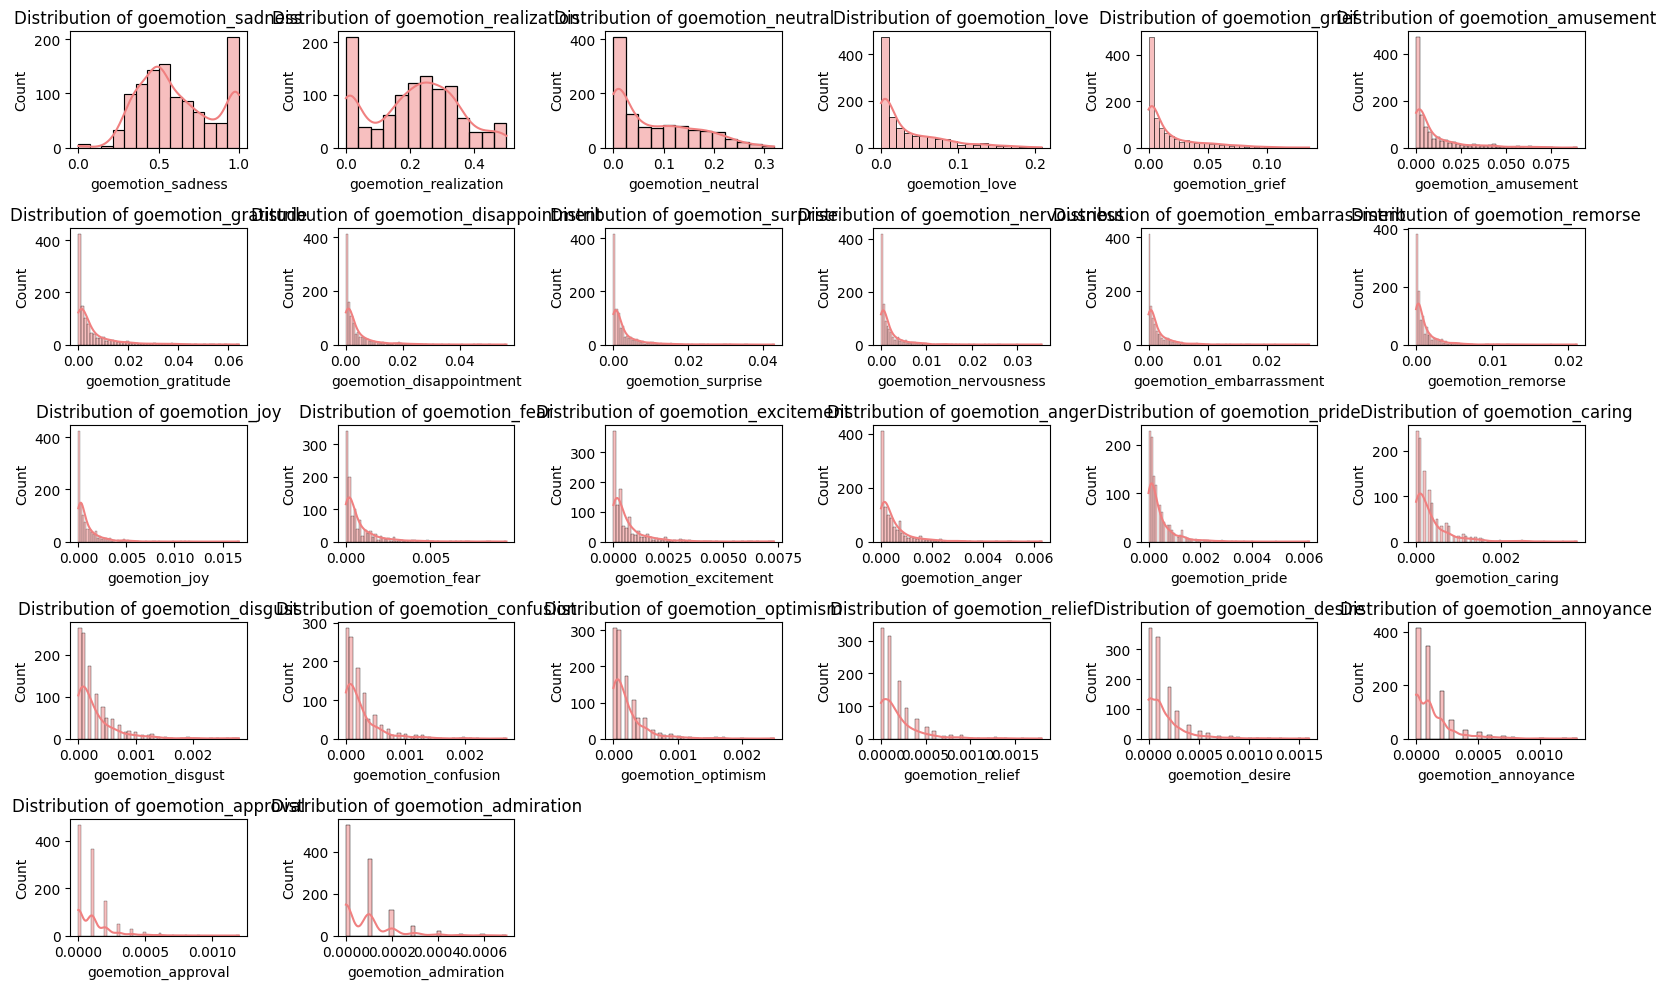

In [70]:
# List of emotion columns
emotion_columns = [
    'goemotion_sadness', 'goemotion_realization', 'goemotion_neutral', 'goemotion_love', 
    'goemotion_grief', 'goemotion_amusement', 'goemotion_gratitude', 'goemotion_disappointment', 
    'goemotion_surprise', 'goemotion_nervousness', 'goemotion_embarrassment', 'goemotion_remorse', 
    'goemotion_joy', 'goemotion_fear', 'goemotion_excitement', 'goemotion_anger', 
    'goemotion_pride', 'goemotion_caring', 'goemotion_disgust', 'goemotion_confusion', 
    'goemotion_optimism', 'goemotion_relief', 'goemotion_desire', 'goemotion_annoyance', 
    'goemotion_approval', 'goemotion_admiration'
]

# Plot distribution of emotion scores
plt.figure(figsize=(16, 10))
for i, column in enumerate(emotion_columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(merged_df[column], kde=True, color='lightcoral')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


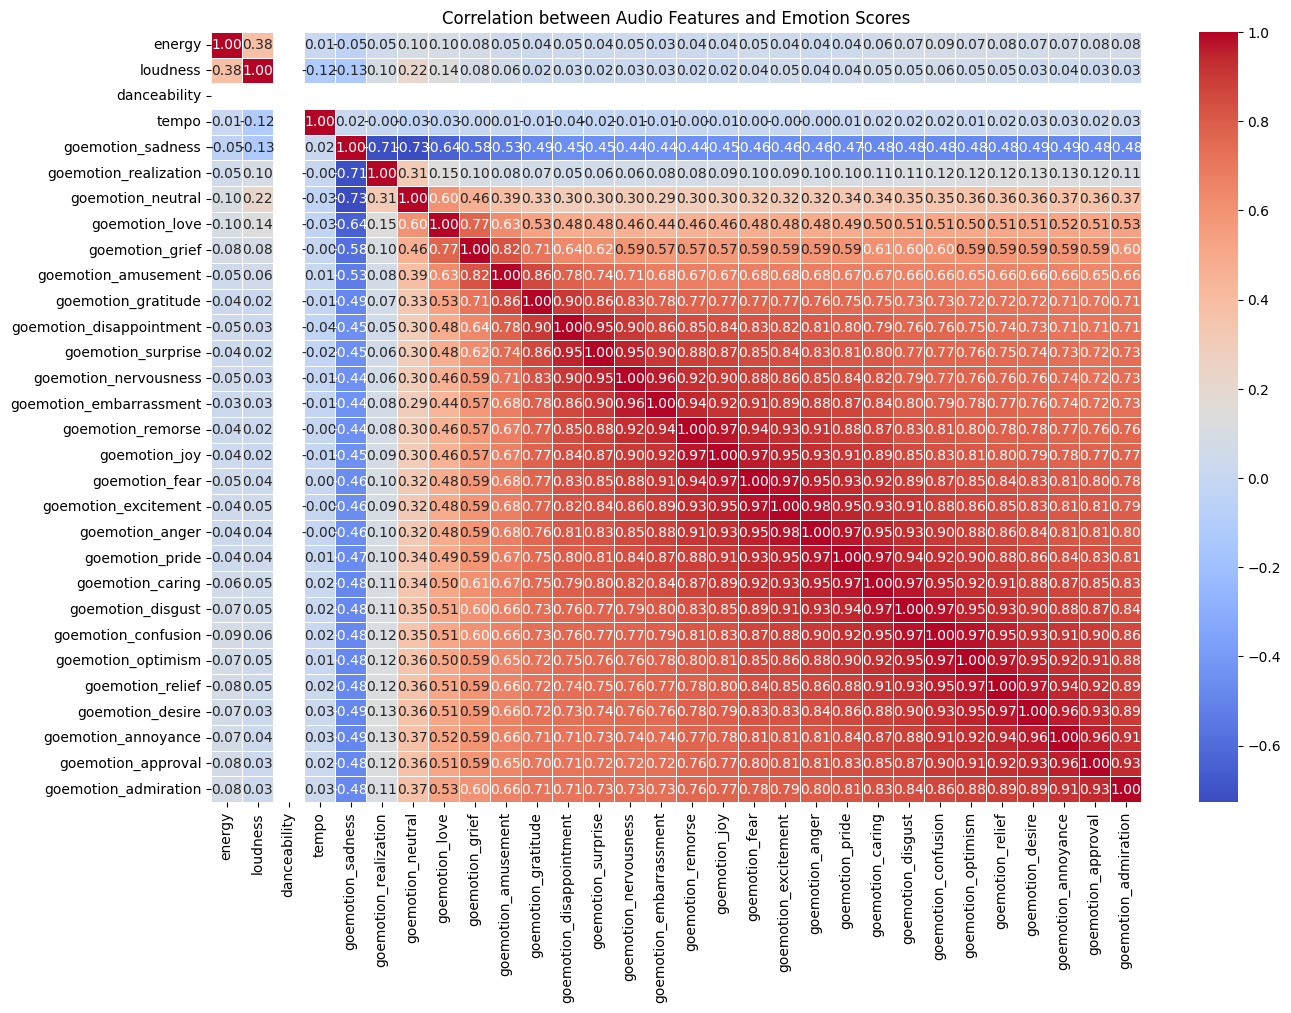

In [71]:
# Select numeric columns for analysis
numeric_features = ['energy', 'loudness', 'danceability', 'tempo'] + emotion_columns

# Correlation matrix
corr_matrix = merged_df[numeric_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Audio Features and Emotion Scores')
plt.show()


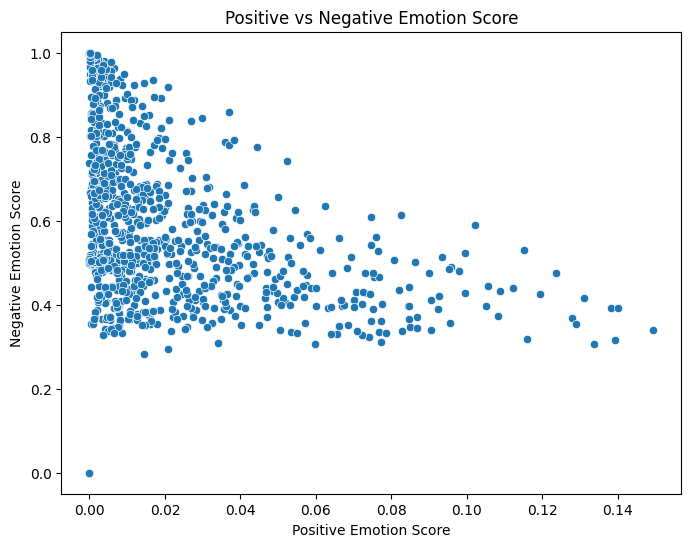

In [72]:
# Define positive and negative emotions
positive_emotions = ['goemotion_joy', 'goemotion_amusement', 'goemotion_gratitude', 
                     'goemotion_optimism', 'goemotion_pride', 'goemotion_approval', 
                     'goemotion_admiration', 'goemotion_relief', 'goemotion_caring']

negative_emotions = ['goemotion_sadness', 'goemotion_fear', 'goemotion_anger', 
                     'goemotion_disgust', 'goemotion_nervousness', 'goemotion_annoyance', 
                     'goemotion_remorse', 'goemotion_grief', 'goemotion_confusion']

# Create composite positive and negative emotion scores
merged_df['positive_emotion_score'] = merged_df[positive_emotions].sum(axis=1)
merged_df['negative_emotion_score'] = merged_df[negative_emotions].sum(axis=1)

# Plot the positive vs. negative emotion scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df['positive_emotion_score'], y=merged_df['negative_emotion_score'])
plt.title('Positive vs Negative Emotion Score')
plt.xlabel('Positive Emotion Score')
plt.ylabel('Negative Emotion Score')
plt.show()


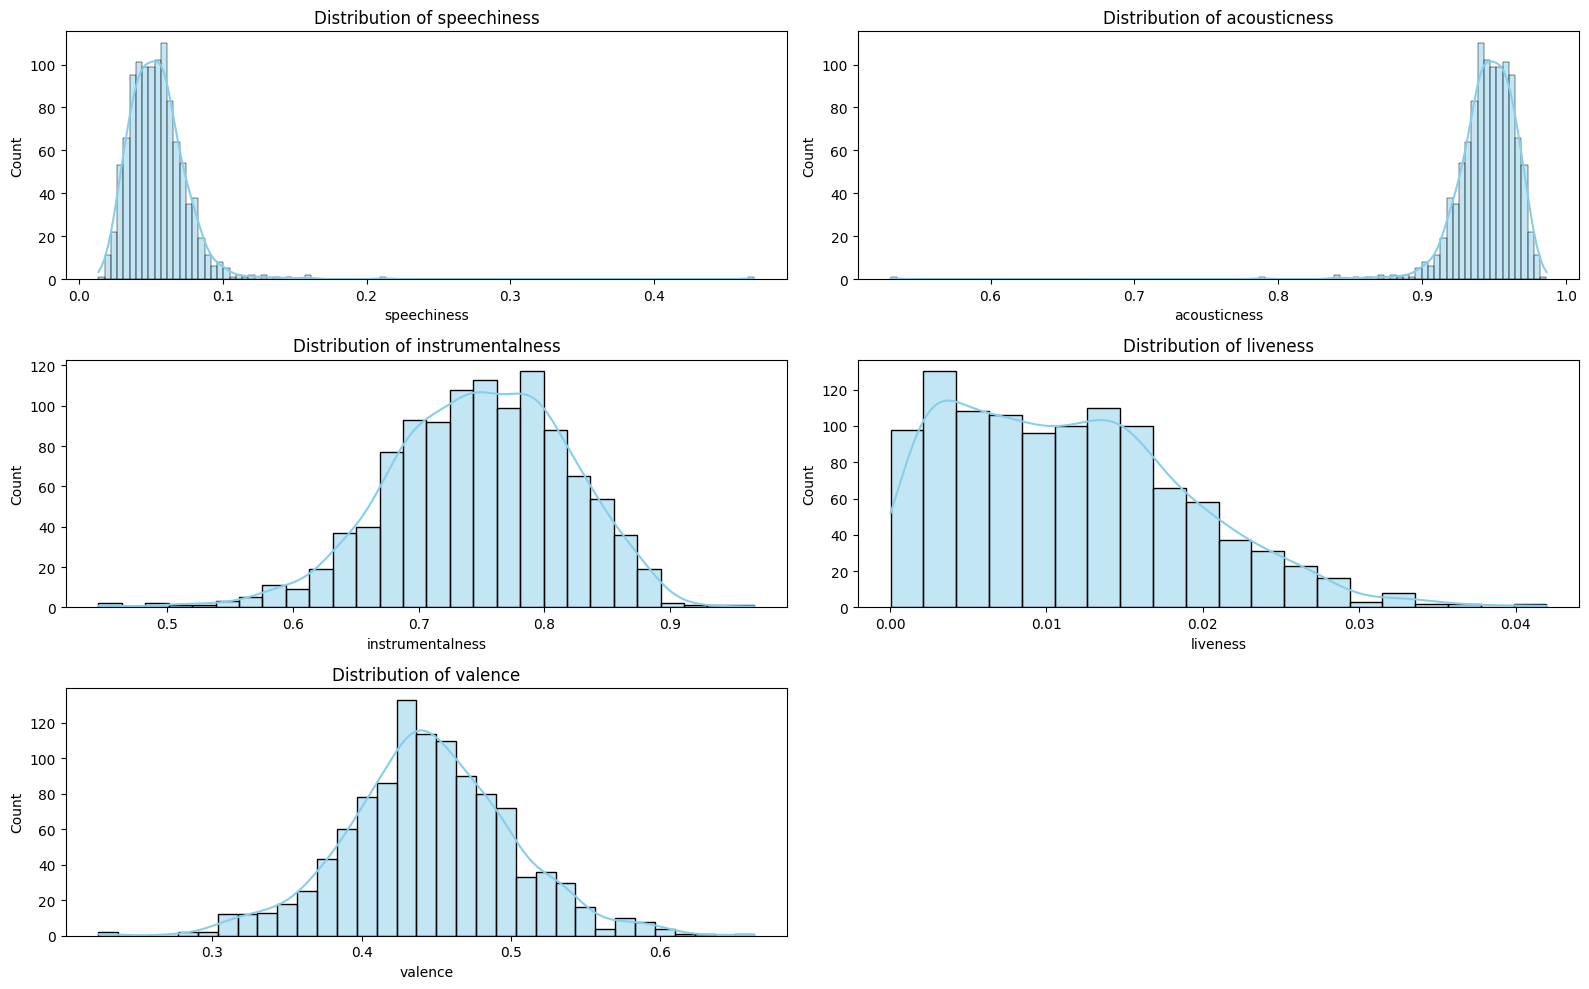

In [73]:
# List of audio features to analyze
audio_features = ['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Plot distribution of each audio feature
plt.figure(figsize=(16, 10))
for i, column in enumerate(audio_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(merged_df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


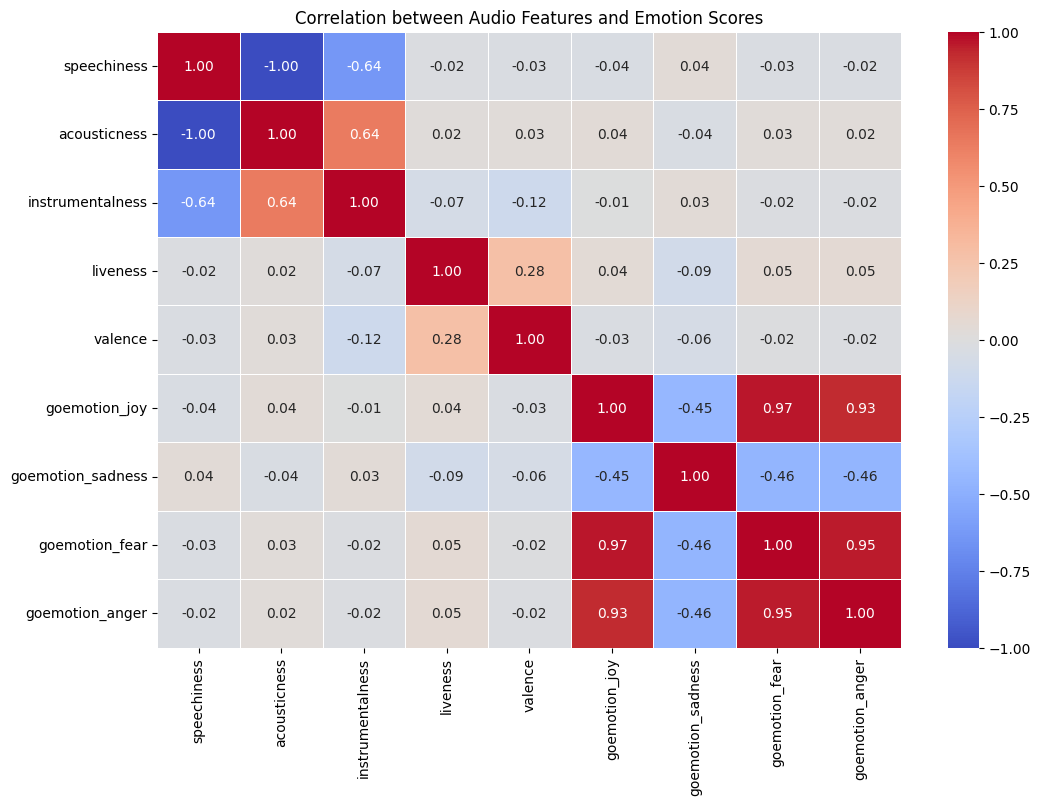

In [74]:
# Select relevant columns for correlation analysis
relevant_columns = audio_features + ['goemotion_joy', 'goemotion_sadness', 'goemotion_fear', 'goemotion_anger']

# Calculate correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Audio Features and Emotion Scores')
plt.show()


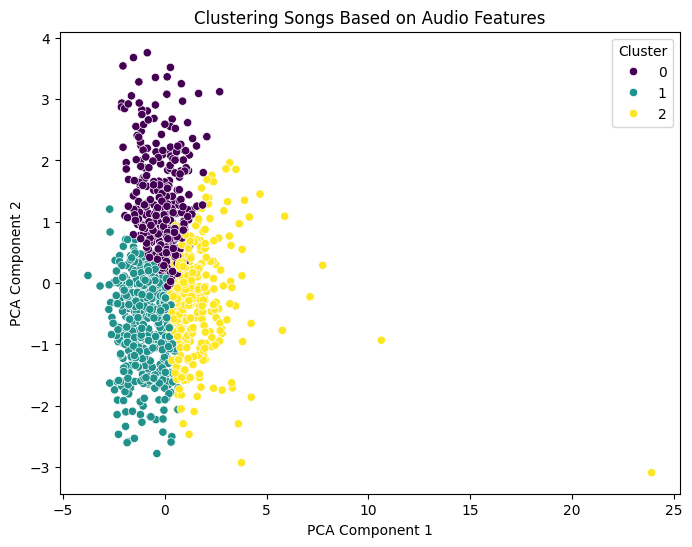

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the audio features before clustering
scaler = StandardScaler()
scaled_audio_features = scaler.fit_transform(merged_df[audio_features])

# Perform KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(scaled_audio_features)

# Visualize clusters in a 2D plot (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_audio_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=merged_df['cluster'], palette='viridis')
plt.title('Clustering Songs Based on Audio Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
